# Logistic Regression

Logistic Regression on the Titanic dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
train = pd.read_csv('data/titanic_train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
t = train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
d = train.describe()

## EDA

Text(0.5, 1.0, 'Numeric Features Count')

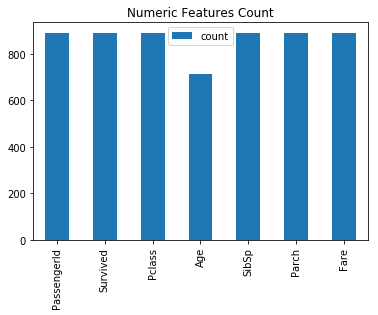

In [5]:
dT = d.T
dT.plot.bar(y='count')
plt.title('Numeric Features Count')

### Count of Survived vs Not Survived

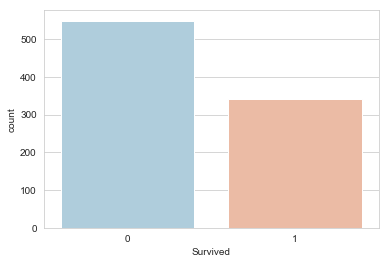

In [12]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=train, palette='RdBu_r')

### Checking if survivability is related to sex

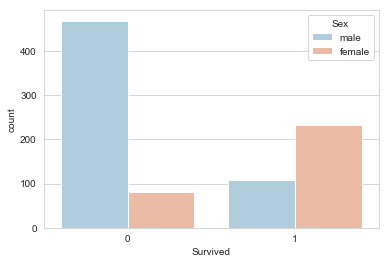

In [13]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Sex', data=train, palette='RdBu_r')

#### More females survived than males!

### Checking if survival is related to passenger class

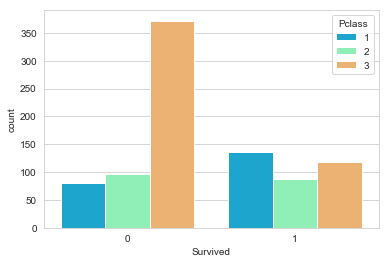

In [14]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Pclass', data=train, palette='rainbow')

#### A large number of 3rd class passengers died

### Plotting the fraction of passenger count that survived, by each class

Text(0.5, 1.0, 'Survival by Class')

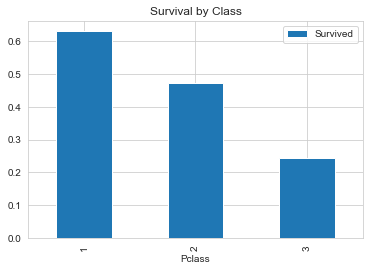

In [15]:
f_class_survived = train.groupby('Pclass')['Survived'].mean()
f_class_survived = pd.DataFrame(f_class_survived)
f_class_survived.plot.bar(y='Survived')
plt.title('Survival by Class')

### Checking if there is a pattern related to having siblings/spouse

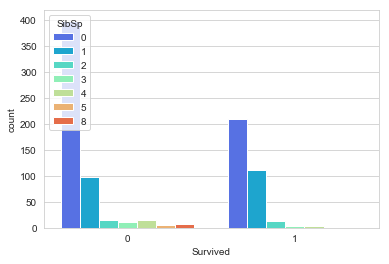

In [16]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='SibSp', data=train, palette='rainbow')

#### There seems to be a weak trend that the chance of survivability increased if there were more no. of siblings/spouse

### Age Distribution

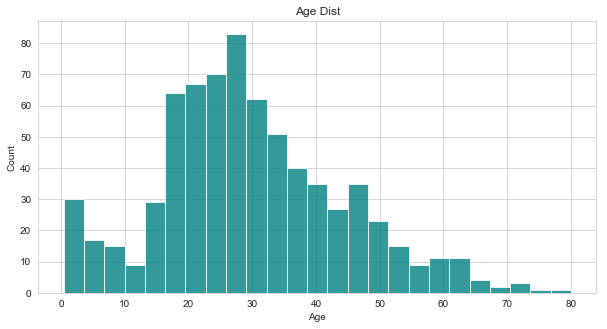

In [18]:
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Dist')
train['Age'].hist(bins=25, color='teal', alpha=0.8, figsize=(10, 5))

### Age distribution across passenger class

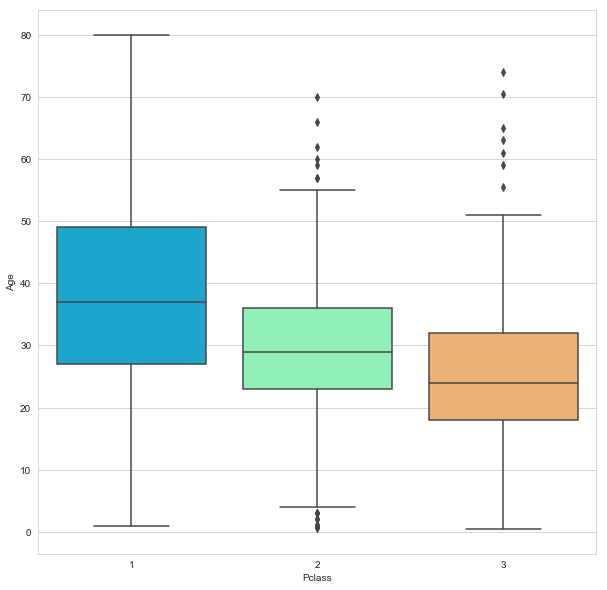

In [21]:
plt.figure(figsize=(10, 10))
plt.xlabel('Class')
plt.ylabel('Age')
sns.boxplot(x='Pclass', y='Age', data=train, palette='rainbow')

Text(0.5, 0, 'Class')

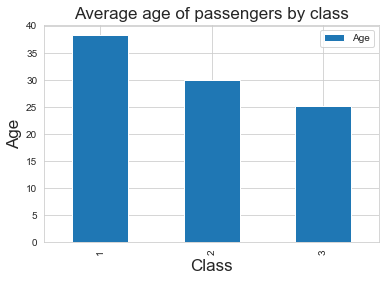

In [23]:
f_class_age=train.groupby('Pclass')['Age'].mean()
f_class_age = pd.DataFrame(f_class_age)
f_class_age.plot.bar(y='Age')
plt.title("Average age of passengers by class",fontsize=17)
plt.ylabel("Age", fontsize=17)
plt.xlabel("Class", fontsize=17)

## Data Manipulation

### Filling up NA values

In [27]:
a = list(f_class_age['Age'])

def fill_na(cols):
    age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(age):
        if Pclass == 1:
            return a[0]
        elif Pclass == 2:
            return a[1]
        else:
            return a[2]
        
    else:
        return age

In [28]:
train['Age'] = train[['Age', 'Pclass']].apply(fill_na, axis=1)

Text(0.5, 1.0, 'Numeric Features Count')

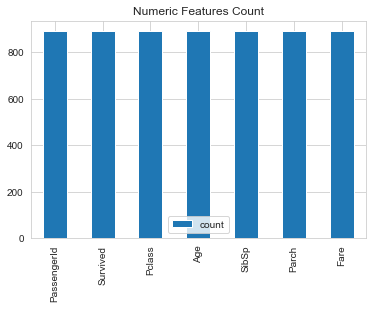

In [30]:
d = train.describe()
dT = d.T
dT.plot.bar(y='count')
plt.title('Numeric Features Count')

### Dropping the 'Cabin' feature and other null values

In [31]:
train.drop('Cabin', axis=1, inplace=True)
train.dropna(inplace=True)
train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
91,92,0,3,"Andreasson, Mr. Paul Edvin",male,20.0,0,0,347466,7.8542,S
132,133,0,3,"Robins, Mrs. Alexander A (Grace Charity Laury)",female,47.0,1,0,A/5. 3337,14.5000,S
84,85,1,2,"Ilett, Miss. Bertha",female,17.0,0,0,SO/C 14885,10.5000,S
600,601,1,2,"Jacobsohn, Mrs. Sidney Samuel (Amy Frances Chr...",female,24.0,2,1,243847,27.0000,S
336,337,0,1,"Pears, Mr. Thomas Clinton",male,29.0,1,0,113776,66.6000,S


### Dropping unnecessary features

In [32]:
train.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
train.sample(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
98,1,2,female,34.0,0,1,23.0000,S
263,0,1,male,40.0,0,0,0.0000,S
473,1,2,female,23.0,0,0,13.7917,C
414,1,3,male,44.0,0,0,7.9250,S
221,0,2,male,27.0,0,0,13.0000,S


### One-hot encoding

In [33]:
sex = pd.get_dummies(train['Sex'], drop_first=True)
embark = pd.get_dummies(train['Embarked'], drop_first=True)

In [34]:
train.drop(['Sex', 'Embarked'], axis=1, inplace=True)
train = pd.concat([train, sex, embark], axis=1)
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


## Logistic Regression

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived', axis=1),
                                                    train['Survived'], test_size=0.2)

X_train.shape, X_test.shape

((711, 8), (178, 8))

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [45]:
nsimu = 50
penalty = [0] * nsimu
model = [0] * nsimu
predictions = [0] * nsimu
class_report = [0] * nsimu
f1 = [0] * nsimu

In [48]:
for i in range(1, nsimu):
    model[i] = (LogisticRegression(C=i/1000, tol=1e-4, max_iter=100, solver='newton-cg'))
    model[i].fit(X_train, y_train)
    predictions[i] = model[i].predict(X_test)
    class_report[i] = classification_report(y_test, predictions[i])
    l = class_report[i].split()
    f1[i] = l[len(l) - 2]
    penalty[i] = 1000/i

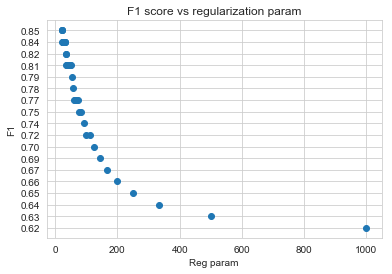

In [49]:
plt.scatter(penalty[1:len(penalty) - 2], f1[1:len(f1) - 2])
plt.title('F1 score vs regularization param')
plt.xlabel('Reg param')
plt.ylabel('F1')
plt.show()